In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel('rating_years.xlsx', sheet_name='WeightedAverage')

In [4]:
Moneycost = np.array(data['Cost']*20, dtype = np.float64)
SocialPercent = np.array(data['WeightedAverage']*100, dtype = np.float64)
alpha = np.array([0, 0.25, 0.5, 0.75, 1])

In [5]:
x = np.arange(0,1.01,.01)
y1 = np.interp(x, alpha, Moneycost)
y2 = np.interp(x, alpha, SocialPercent)

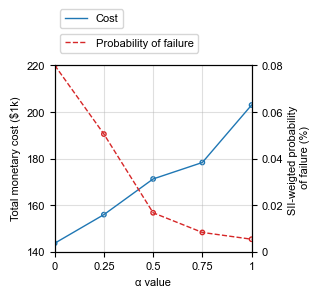

In [23]:
import matplotlib as mpl
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8)
plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})

fig, ax1 = plt.subplots(figsize=(3.3,3.3))

ax1.set_xlim(0, 1)
ax1.set_ylim(140,220)
ax1.set(yticks=[140, 160, 180, 200, 220], yticklabels=[140, 160, 180, 200, 220])
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.set(xticks=[0, .25, .50, .75, 1], xticklabels=[0, .25, .50, .75, 1])


ax1.set_xlabel('α value', fontname="Arial", fontsize=8)
ax1.set_ylabel('Total monetary cost ($1k)', fontname="Arial", fontsize=8)


ax2 = ax1.twinx()
ax2.set_ylim(0,0.08)
ax2.set(yticks=[0, 0.02, 0.04, 0.06, 0.08], yticklabels=[0, 0.02, 0.04, 0.06, 0.08])
ax2.set_ylabel('SII-weigted probability \n of failure (%)', fontname="Arial", fontsize=8)



ax2.plot(x, y2, lw=1, linestyle='--', color='tab:red', label='Probability of failure')
ax1.plot(x, y1/1000, lw=1, color='tab:blue', label='Cost')
# ax2.set_ylim(0,30)
# plt.plot(x, y1+y2, linestyle = 'dashdot', color = 'tab:purple',label = 'Summation of costs')

ax2.scatter(alpha, SocialPercent, marker='o', facecolor='none', color='tab:red', s = 10)
ax1.scatter(alpha, Moneycost/1000, marker='o', facecolor='none', color='tab:blue', s = 10)

# plt.scatter(alpha, Totalcost, marker='o',facecolor='none', color = 'tab:purple')

          
          


ax1.grid(alpha=.4)
lgd2 = ax2.legend(fontsize=8, loc='upper left',bbox_to_anchor=(0, 1.2), fancybox=True, shadow=False)
lgd1 = ax1.legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 1.33), fancybox=True, shadow=False)

plt.tight_layout()
fig.savefig('alphachoice.jpg', dpi = 600, bbox_inches='tight')